In [50]:
import numpy as np
import autograd.numpy as np_
from autograd import grad
import pandas as pd
import joblib
import scipy.stats as stats
from sklearn.tree import DecisionTreeClassifier


In [51]:
# lendo o CSV
df_og = pd.read_csv("avc-data.csv")
# One Hot Encoding dos dados (tranformando variáveis em booleanos)
df_og = pd.get_dummies(df_og)
df_og.to_csv('avc-data-dummies.csv')

df_og

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.6,1,0,1,0,...,0,1,0,0,0,1,0,1,0,0
1,51676,61.0,0,0,202.21,NaN,1,1,0,0,...,0,0,1,0,1,0,0,0,1,0
2,31112,80.0,0,1,105.92,32.5,1,0,1,0,...,0,1,0,0,1,0,0,0,1,0
3,60182,49.0,0,0,171.23,34.4,1,1,0,0,...,0,1,0,0,0,1,0,0,0,1
4,1665,79.0,1,0,174.12,24.0,1,1,0,0,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,80.0,1,0,83.75,NaN,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
5106,44873,81.0,0,0,125.20,40.0,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0
5107,19723,35.0,0,0,82.99,30.6,0,1,0,0,...,0,0,1,0,1,0,0,0,1,0
5108,37544,51.0,0,0,166.29,25.6,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0


In [52]:
def accuracy(y_test, y_est):
    return np.mean(np.sign(y_test)==np.sign(y_est))

# *Aproximação Linear*
# Testes com DataFrame original (Número total de Pacientes)

## Teste 1 - 
Retirada de Colunas que não são possíveis de ser representadas em booleano.

Colunas representadas - 
* hypertension
* heart_disease
* stroke
* gender_Female
* gender_Male 
* gender_Other
* ever_married_No
* ever_married_Yes
* work_type_Govt_job
* work_type_Never_worked
* work_type_Private
* work_type_Self-employed
* work_type_children
* Residence_type_Rural
* Residence_type_Urban
* smoking_status_Unknown
* smoking_status_formerly smoked
* smoking_status_never smoked
* smoking_status_smokes


"Learning Rate" do nosso modelo - 
* alpha = 0.01

Épocas - Iterações do Código 
* epocas = 10000

In [53]:
import numpy as np
import autograd.numpy as np_
from autograd import grad

from sklearn.model_selection import train_test_split

# retirada de variáveis não booleanas do DataFrame (variáveis que não possíveis de serem representadas no OneHot Encoding)
df = df_og.drop(columns=['id','age','bmi','avg_glucose_level'])
df = df.dropna()

# Criação da Matriz de Features - Todos as Variáveis, menos o resultado de se a pessoa teve um AVC ou não
df_values = df.drop(columns=['stroke'])
x = df_values.to_numpy()
x

# Criação da Matriz de Resultados Medidos - Apenas as informações de se a pessoa teve um AVC ou não
df_stroke = df['stroke']
df_stroke = df_stroke.replace(0,-1)
y = df_stroke.to_numpy()
y

# Criação de Matrizes de Treinamento e de Teste, para podermos conferir a acurácia do processo de predição
X_train, X_test, Y_train, Y_test = train_test_split(x, y, train_size=0.5)


# W - Matriz de Pesos
w = np.random.randn(x.shape[1],1)

# Viés (Bias) da equação
b = 0.1

# Matriz de Features (valores medidos)
X = X_train.T*1.0

# Matriz de Resultados Medidos
Y = Y_train.T*1.0

# Cálculo do Erro - Uma equação de Reta (ax + b = y), mas com matrizes que possuem mais do que dois valores cardeais
def erro(param):
    w,b,x,y= param
    y_ = w.T@x + b
    return np_.mean((y_-y)**2)

# processo de realização da função de gradiente
g = grad(erro)

# "Learning Rate" do nosso modelo
alpha = 0.01

# Épocas - Iterações do Código
epocas = 10000

# Iteração de for para o aprendizado do modelo
for _ in range(epocas):
    g_= g((w,b,X,Y))
    w -= alpha*g_[0]
    b -= alpha*g_[1]

# Estimativa de Y (resultado da aproximação linear)
y_est =  w.T@X_test.T + b

# checando a acurácia do modelo
acc = accuracy(y_est,Y_test.T)

print(f'Accuracy : {acc*100:.2f}%')
print(f'Hipótese Nula : {(df_stroke.value_counts().sort_values().max()/df_stroke.shape[0])*100:.2f}%')

Accuracy : 95.62%
Hipótese Nula : 95.13%


## Teste 2 - 
Retirada de colunas não possíveis de serem representadas em booleano, além de fatos relacionados a condição de vida do paciente.

Colunas representadas - 
* hypertension
* heart_diseasestroke	
* smoking_status_Unknown	
* smoking_status_formerly smoked	
* smoking_status_never smoked	
* smoking_status_smokes

"Learning Rate" do nosso modelo - 
* alpha = 0.01

Épocas - Iterações do Código 
* epocas = 10000

In [54]:
import numpy as np
import autograd.numpy as np_
from autograd import grad
from sklearn.model_selection import train_test_split

# retirada de variáveis não booleanas do DataFrame (variáveis que não possíveis de serem representadas no OneHot Encoding)
df = df_og.drop(columns=['id','age','bmi','avg_glucose_level'])
df = df.dropna()

# Criação da Matriz de Features - Variáveis relacionadas a saúde, biologia e gênero da pessoa e não a condição de vida do indivíduo
df_values = df.drop(columns=['stroke','gender_Female',	'gender_Male',	'gender_Other',	'ever_married_No',	'ever_married_Yes',	'work_type_Govt_job',	'work_type_Never_worked',	'work_type_Private',	'work_type_Self-employed',	'work_type_children',	'Residence_type_Rural',	'Residence_type_Urban'])
x = df_values.to_numpy()
x

# Criação da Matriz de Resultados Medidos - Apenas as informações de se a pessoa teve um AVC ou não
df_stroke = df['stroke']
df_stroke = df_stroke.replace(0,-1)
y = df_stroke.to_numpy()
y

# Criação de Matrizes de Treinamento e de Teste, para podermos conferir a acurácia do processo de predição
X_train, X_test, Y_train, Y_test = train_test_split(x, y, train_size=0.5)


# W - Matriz de Pesos
w = np.random.randn(x.shape[1],1)

# Viés (Bias) da equação
b = 0.1

# Matriz de Features (valores medidos)
X = X_train.T*1.0

# Matriz de Resultados Medidos
Y = Y_train.T*1.0

# Cálculo do Erro - Uma equação de Reta (ax + b = y), mas com matrizes que possuem mais do que dois valores cardeais
def erro(param):
    w,b,x,y= param
    y_ = w.T@x + b
    return np_.mean((y_-y)**2)

# processo de realização da função de gradiente
g = grad(erro)

# "Learning Rate" do nosso modelo
alpha = 0.01

# Épocas - Iterações do Código
epocas = 10000

# Iteração de for para o aprendizado do modelo
for _ in range(epocas):
    g_= g((w,b,X,Y))
    w -= alpha*g_[0]
    b -= alpha*g_[1]

# Estimativa de Y (resultado da aproximação linear)
y_est =  w.T@X_test.T + b

# checando a acurácia do modelo
acc = accuracy(y_est,Y_test.T)

print(f'Accuracy : {acc*100:.2f}%')
print(f'Hipótese Nula : {(df_stroke.value_counts().sort_values().max()/df_stroke.shape[0])*100:.2f}%')

Accuracy : 95.62%
Hipótese Nula : 95.13%


# *Aproximação Linear*
# Testes com DataFrame Ajustado - Mesmo número de pacientes que sofreram e não sofreram AVC

## Teste 1 - 
Retirada de Colunas que não são possíveis de ser representadas em booleano.

Colunas representadas - 
* hypertension
* heart_disease
* stroke
* gender_Female
* gender_Male 
* gender_Other
* ever_married_No
* ever_married_Yes
* work_type_Govt_job
* work_type_Never_worked
* work_type_Private
* work_type_Self-employed
* work_type_children
* Residence_type_Rural
* Residence_type_Urban
* smoking_status_Unknown
* smoking_status_formerly smoked
* smoking_status_never smoked
* smoking_status_smokes

"Learning Rate" do nosso modelo - 
* alpha = 0.01

Épocas - Iterações do Código 
* epocas = 10000

In [62]:
import numpy as np
import autograd.numpy as np_
from autograd import grad
from sklearn.model_selection import train_test_split

# retirada de variáveis não booleanas do DataFrame (variáveis que não possíveis de serem representadas no OneHot Encoding)
# df = df.drop(columns=['id','age','bmi','avg_glucose_level'])

# df de quem teve AVC
df_h0_stroke= df_og[df_og['stroke']==1]

# df de quem não teve AVC
df_no_stroke = df_og[df_og['stroke']==0]

# selecionando mesma quantidade de pessoas que tiveram um AVC
df_h0_no_stroke = df_no_stroke.iloc[0:249]

# df com mesma proporção de quem teve e quem não teve AVC, para minimizar a hipótese nula
df_h0 = pd.concat([df_h0_stroke,df_h0_no_stroke])

df = df_h0.drop(columns=['id','avg_glucose_level','bmi','age'])
df = df.dropna()

# Criação da Matriz de Features - Variáveis relacionadas a saúde, biologia e gênero da pessoa e não a condição de vida do indivíduo
df_values = df.drop(columns=['stroke'])
x = df_values.to_numpy()
x

# Criação da Matriz de Resultados Medidos - Apenas as informações de se a pessoa teve um AVC ou não
df_stroke = df['stroke']
df_stroke = df_stroke.replace(0,-1)
y = df_stroke.to_numpy()
y

# Criação de Matrizes de Treinamento e de Teste, para podermos conferir a acurácia do processo de predição
X_train, X_test, Y_train, Y_test = train_test_split(x, y, train_size=0.5)


# W - Matriz de Pesos
w = np.random.randn(x.shape[1],1)

# Viés (Bias) da equação
b = 0.1

# Matriz de Features (valores medidos)
X = X_train.T*1.0

# Matriz de Resultados Medidos
Y = Y_train.T*1.0

# Cálculo do Erro - Uma equação de Reta (ax + b = y), mas com matrizes que possuem mais do que dois valores cardeais
def erro(param):
    w,b,x,y= param
    y_ = w.T@x + b
    return np_.mean((y_-y)**2)

# processo de realização da função de gradiente
g = grad(erro)

# "Learning Rate" do nosso modelo
alpha = 0.01

# Épocas - Iterações do Código
epocas = 10000

# Iteração de for para o aprendizado do modelo
for _ in range(epocas):
    g_= g((w,b,X,Y))
    w -= alpha*g_[0]
    b -= alpha*g_[1]

# Estimativa de Y (resultado da aproximação linear)
y_est =  w.T@X_test.T + b

# checando a acurácia do modelo
acc = accuracy(y_est,Y_test.T)

print(f'Accuracy : {acc*100:.2f}%')
print(f'Hipótese Nula : {(df_stroke.value_counts().sort_values().max()/df_stroke.shape[0])*100:.2f}%')


Accuracy : 66.67%
Hipótese Nula : 50.00%


## Teste 2 - 
Retirada de Colunas que não são possíveis de ser representadas em booleano, além de variáveis relacionadas a condição de vida do indivíduo (trabalho, moradia, etc.).

Colunas representadas - 
* hypertension
* heart_disease
* stroke	
* smoking_status_Unknown	
* smoking_status_formerly smoked	
* smoking_status_never smoked	
* smoking_status_smokes

"Learning Rate" do nosso modelo - 
* alpha = 0.01

Épocas - Iterações do Código 
* epocas = 10000

In [56]:
import numpy as np
import autograd.numpy as np_
from autograd import grad
from sklearn.model_selection import train_test_split

# retirada de variáveis não booleanas do DataFrame (variáveis que não possíveis de serem representadas no OneHot Encoding)
# df = df.drop(columns=['id','age','bmi','avg_glucose_level'])

# df de quem teve AVC
df_h0_stroke= df_og[df_og['stroke']==1]

# df de quem não teve AVC
df_no_stroke = df_og[df_og['stroke']==0]

# selecionando mesma quantidade de pessoas que tiveram um AVC
df_h0_no_stroke = df_no_stroke.iloc[0:249]

# df com mesma proporção de quem teve e quem não teve AVC, para minimizar a hipótese nula
df_h0 = pd.concat([df_h0_stroke,df_h0_no_stroke])

df = df_h0.drop(columns=['id','avg_glucose_level','bmi','age'])
df = df.dropna()

# Criação da Matriz de Features - Variáveis relacionadas a saúde, biologia e gênero da pessoa e não a condição de vida do indivíduo
df_values = df.drop(columns=['stroke','gender_Female',	'gender_Male',	'gender_Other',	'ever_married_No',	'ever_married_Yes',	'work_type_Govt_job',	'work_type_Never_worked',	'work_type_Private',	'work_type_Self-employed',	'work_type_children',	'Residence_type_Rural',	'Residence_type_Urban'])
x = df_values.to_numpy()
x

# Criação da Matriz de Resultados Medidos - Apenas as informações de se a pessoa teve um AVC ou não
df_stroke = df['stroke']
df_stroke = df_stroke.replace(0,-1)
y = df_stroke.to_numpy()
y

# Criação de Matrizes de Treinamento e de Teste, para podermos conferir a acurácia do processo de predição
X_train, X_test, Y_train, Y_test = train_test_split(x, y, train_size=0.5)


# W - Matriz de Pesos
w = np.random.randn(x.shape[1],1)

# Viés (Bias) da equação
b = 0.1

# Matriz de Features (valores medidos)
X = X_train.T*1.0

# Matriz de Resultados Medidos
Y = Y_train.T*1.0

# Cálculo do Erro - Uma equação de Reta (ax + b = y), mas com matrizes que possuem mais do que dois valores cardeais
def erro(param):
    w,b,x,y= param
    y_ = w.T@x + b
    return np_.mean((y_-y)**2)

# processo de realização da função de gradiente
g = grad(erro)

# "Learning Rate" do nosso modelo
alpha = 0.01

# Épocas - Iterações do Código
epocas = 10000

# Iteração de for para o aprendizado do modelo
for _ in range(epocas):
    g_= g((w,b,X,Y))
    w -= alpha*g_[0]
    b -= alpha*g_[1]

# Estimativa de Y (resultado da aproximação linear)
y_est =  w.T@X_test.T + b

# checando a acurácia do modelo
acc = accuracy(y_est,Y_test.T)

print(f'Accuracy : {acc*100:.2f}%')
print(f'Hipótese Nula : {(df_stroke.value_counts().sort_values().max()/df_stroke.shape[0])*100:.2f}%')

Accuracy : 64.26%
Hipótese Nula : 50.00%


## Teste 3 - 
Retirada de Colunas que não são possíveis de ser representadas em booleano, além de variáveis relacionadas a condição de vida do indivíduo (trabalho, gênero, etc.).

Colunas representadas - 
* hypertension
* heart_disease
* stroke
* work_type_Govt_job
* work_type_Never_worked
* work_type_Private
* work_type_Self-employed
* work_type_children
* smoking_status_Unknown
* smoking_status_formerly smoked
* smoking_status_never smoked
* smoking_status_smokes

"Learning Rate" do nosso modelo - 
* alpha = 0.01

Épocas - Iterações do Código 
* epocas = 10000

In [57]:
import numpy as np
import autograd.numpy as np_
from autograd import grad
from sklearn.model_selection import train_test_split

# retirada de variáveis não booleanas do DataFrame (variáveis que não possíveis de serem representadas no OneHot Encoding)
# df = df.drop(columns=['id','age','bmi','avg_glucose_level'])

# df de quem teve AVC
df_h0_stroke= df_og[df_og['stroke']==1]

# df de quem não teve AVC
df_no_stroke = df_og[df_og['stroke']==0]

# selecionando mesma quantidade de pessoas que tiveram um AVC
df_h0_no_stroke = df_no_stroke.iloc[0:249]

# df com mesma proporção de quem teve e quem não teve AVC, para minimizar a hipótese nula
df_h0 = pd.concat([df_h0_stroke,df_h0_no_stroke])

df = df_h0.drop(columns=['id','avg_glucose_level','bmi','age'])
df = df.dropna()

# Criação da Matriz de Features - Variáveis relacionadas a saúde, biologia e gênero da pessoa e não a condição de vida do indivíduo
df_values = df.drop(columns=['stroke','gender_Female','gender_Male','gender_Other','ever_married_No','ever_married_Yes','Residence_type_Rural','Residence_type_Urban'])
x = df_values.to_numpy()
x

# Criação da Matriz de Resultados Medidos - Apenas as informações de se a pessoa teve um AVC ou não
df_stroke = df['stroke']
df_stroke = df_stroke.replace(0,-1)
y = df_stroke.to_numpy()
y

# Criação de Matrizes de Treinamento e de Teste, para podermos conferir a acurácia do processo de predição
X_train, X_test, Y_train, Y_test = train_test_split(x, y, train_size=0.5)


# W - Matriz de Pesos
w = np.random.randn(x.shape[1],1)

# Viés (Bias) da equação
b = 0.1

# Matriz de Features (valores medidos)
X = X_train.T*1.0

# Matriz de Resultados Medidos
Y = Y_train.T*1.0

# Cálculo do Erro - Uma equação de Reta (ax + b = y), mas com matrizes que possuem mais do que dois valores cardeais
def erro(param):
    w,b,x,y= param
    y_ = w.T@x + b
    return np_.mean((y_-y)**2)

# processo de realização da função de gradiente
g = grad(erro)

# "Learning Rate" do nosso modelo
alpha = 0.01

# Épocas - Iterações do Código
epocas = 10000

# Iteração de for para o aprendizado do modelo
for _ in range(epocas):
    g_= g((w,b,X,Y))
    w -= alpha*g_[0]
    b -= alpha*g_[1]

# Estimativa de Y (resultado da aproximação linear)
y_est =  w.T@X_test.T + b

# checando a acurácia do modelo
acc = accuracy(y_est,Y_test.T)

print(f'Accuracy : {acc*100:.2f}%')
print(f'Hipótese Nula : {(df_stroke.value_counts().sort_values().max()/df_stroke.shape[0])*100:.2f}%')

Accuracy : 65.06%
Hipótese Nula : 50.00%


## Teste 4 - 
Retirada de Colunas que não são possíveis de ser representadas em booleano.

Colunas representadas - 
* hypertension
* heart_disease
* stroke
* gender_Female
* gender_Male 
* gender_Other
* work_type_Govt_job
* work_type_Never_worked
* work_type_Private
* work_type_Self-employed
* work_type_children
* smoking_status_Unknown
* smoking_status_formerly smoked
* smoking_status_never smoked
* smoking_status_smokes

"Learning Rate" do nosso modelo - 
* alpha = 0.01

Épocas - Iterações do Código 
* epocas = 10000

In [58]:
import numpy as np
import autograd.numpy as np_
from autograd import grad
from sklearn.model_selection import train_test_split


# df de quem teve AVC
df_h0_stroke= df_og[df_og['stroke']==1]

# df de quem não teve AVC
df_no_stroke = df_og[df_og['stroke']==0]

# selecionando mesma quantidade de pessoas que tiveram um AVC
df_h0_no_stroke = df_no_stroke.iloc[0:249]

# df com mesma proporção de quem teve e quem não teve AVC, para minimizar a hipótese nula
df_h0 = pd.concat([df_h0_stroke,df_h0_no_stroke])

# retirada de variáveis não booleanas do DataFrame (variáveis que não possíveis de serem representadas no OneHot Encoding)
df = df_h0.drop(columns=['id','avg_glucose_level','bmi','age'])
df = df.dropna()

# Criação da Matriz de Features - Variáveis relacionadas a saúde, biologia e gênero da pessoa e não a condição de vida do indivíduo
df_values = df.drop(columns=['stroke','ever_married_No','ever_married_Yes','Residence_type_Rural','Residence_type_Urban'])
x = df_values.to_numpy()
x

# Criação da Matriz de Resultados Medidos - Apenas as informações de se a pessoa teve um AVC ou não
df_stroke = df['stroke']
df_stroke = df_stroke.replace(0,-1)
y = df_stroke.to_numpy()
y

# Criação de Matrizes de Treinamento e de Teste, para podermos conferir a acurácia do processo de predição
X_train, X_test, Y_train, Y_test = train_test_split(x, y, train_size=0.5)


# W - Matriz de Pesos
w = np.random.randn(x.shape[1],1)

# Viés (Bias) da equação
b = 0.1

# Matriz de Features (valores medidos)
X = X_train.T*1.0

# Matriz de Resultados Medidos
Y = Y_train.T*1.0

# Cálculo do Erro - Uma equação de Reta (ax + b = y), mas com matrizes que possuem mais do que dois valores cardeais
def erro(param):
    w,b,x,y= param
    y_ = w.T@x + b
    return np_.mean((y_-y)**2)

# processo de realização da função de gradiente
g = grad(erro)

# "Learning Rate" do nosso modelo
alpha = 0.01

# Épocas - Iterações do Código
epocas = 10000

# Iteração de for para o aprendizado do modelo
for _ in range(epocas):
    g_= g((w,b,X,Y))
    w -= alpha*g_[0]
    b -= alpha*g_[1]

# Estimativa de Y (resultado da aproximação linear)
y_est =  w.T@X_test.T + b

# checando a acurácia do modelo
acc = accuracy(y_est,Y_test.T)

print(f'Accuracy : {acc*100:.2f}%')
print(f'Hipótese Nula : {(df_stroke.value_counts().sort_values().max()/df_stroke.shape[0])*100:.2f}%')

Accuracy : 64.26%
Hipótese Nula : 50.00%


# *Árvore de Decisão*
# Testes com DataFrame Ajustado - Mesmo número de pacientes que sofreram e não sofreram AVC

Accuracy : 61.85%
Hipótese Nula : 50.00%


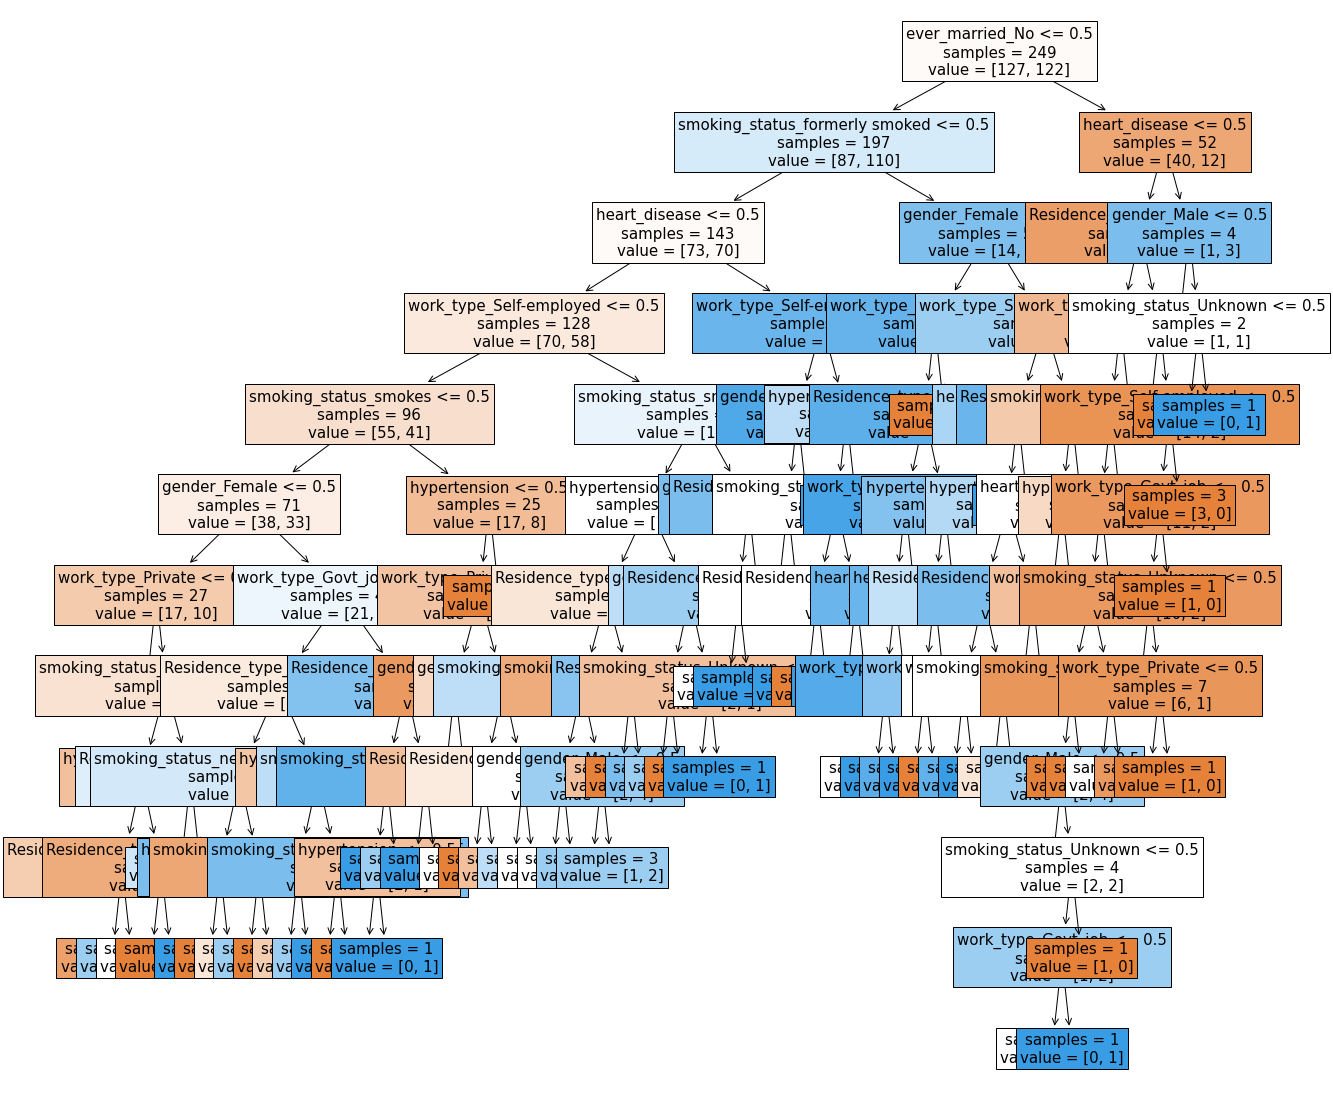

In [68]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score

# df de quem teve AVC
df_h0_stroke= df_og[df_og['stroke']==1]

# df de quem não teve AVC
df_no_stroke = df_og[df_og['stroke']==0]

# selecionando mesma quantidade de pessoas que tiveram um AVC
df_h0_no_stroke = df_no_stroke.iloc[0:249]

# df com mesma proporção de quem teve e quem não teve AVC, para minimizar a hipótese nula
df_h0 = pd.concat([df_h0_stroke,df_h0_no_stroke])

df = df_h0.drop(columns=['id','avg_glucose_level','bmi','age'])
df = df.dropna()

# Criação do DataFrame de Features
df_features = df.drop(columns=['stroke'])
x = df_features.to_numpy()
x

# Criação do DataFrame de Resultados Medidos - Apenas as informações de se a pessoa teve um AVC ou não
df_stroke = df['stroke']
df_rotulo = df_stroke.replace(0,-1)
y = df_rotulo.to_numpy()
y

# Criação de Matrizes de Treinamento e de Teste, para podermos conferir a acurácia do processo de predição
X_train, X_test, Y_train, Y_test = train_test_split(x, y, train_size=0.5)

# criação da árvore de decisão
tree = DecisionTreeClassifier(criterion='entropy')

# Agora, vamos usar o método .fit() para ajustar os parâmetros da árvore:
tree.fit(X_train, Y_train)

# Tentando prever os AVCs
y_pred = tree.predict(X_test)

# Calculando Acurácia
acc = accuracy_score(y_pred,Y_test)

# Prints
print(f'Accuracy : {acc*100:.2f}%')
print(f'Hipótese Nula : {(df_stroke.value_counts().sort_values().max()/df_stroke.shape[0])*100:.2f}%')


# Visualização da Árvore de Decisão que foi gerada
plt.figure( figsize=(20,20) )
a = plot_tree(tree, feature_names=df_features.columns, fontsize=15, 
              node_ids=False, impurity=False, filled=True)